# Gradient Descent Demonstration

Author: Umberto Michelucci, (C) TOELT LLC 2022

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [2]:
hfont = {'fontname':'Helvetica'}
tfont = {'fontname':'Times'}

AXIS_THICKNESS = 2
mpl.rcParams['axes.linewidth'] = AXIS_THICKNESS
mpl.rcParams['xtick.major.width'] = AXIS_THICKNESS
mpl.rcParams['ytick.major.width'] = AXIS_THICKNESS
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.usetex'] = True
#text.usetex : True

$$
f(x) = x^2-1.6x^3+0.02x^5+100e^{-(x-2.5)^2}
$$

the derivative of this function is
$$
f'(x) = 2x-4.8x^2+0.1x^4-200(x-2.5)e^{-(x-2.5)^2}
$$

In [132]:
def f(x):
    return x**2-1.6*x**3+0.02*x**5+100*np.exp(-(x-2.5)**2)

def df(x):
    return 2*x-4.8*x**2+0.1*x**4-200.0*(x-2.5)*np.exp(-(x-2.5)**2)

In [133]:
xx = np.arange(-10,10,0.1)
yy = f(xx)

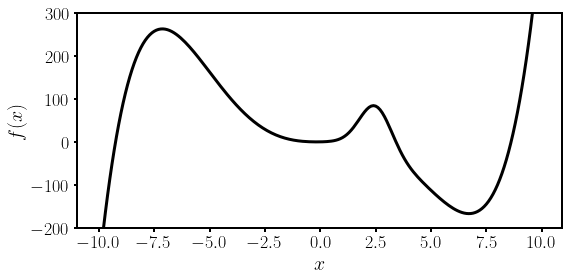

In [134]:
fig = plt.figure(figsize = (8,4))
plt.plot(xx,yy, color = 'black', lw = 3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.ylim(-200,300)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)
plt.tight_layout()
fig.savefig('gd1.eps')
plt.show()

let's try to find the minima of this function. We will use the gradient descent method.

We will use the following formula for the gradient descent
$$
x_{n+1} = x_n - \gamma \frac{df}{dx}(x_n)
$$

In [135]:
def new_approx(old_approx, gamma):
    return old_approx - gamma*df(old_approx)

Let's generate a list of succesful approximations.

In [136]:
def generate_approxs(starting_point, gamma):
    approxs = [starting_point]

    for i in range(10):
        tmp = new_approx(approxs[-1], gamma)
        if ((not math.isnan(tmp)) & (not math.isinf(tmp))):
            approxs.append(tmp)
    
    return approxs

In [173]:
app1 = generate_approxs(-7.5, 0.1)
app2 = generate_approxs(-5.0, 0.1)
app3 = generate_approxs(-5.0, 0.01)
app4 = generate_approxs(9.5, 0.01)

/Users/umberto/Python-Environments/tf25/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


Starting from the left of the peak make the approximations diverge quickly

In [138]:
app1

[-7.5,
 -10.640625,
 -82.35975954115393,
 -456918.5102514672,
 -4.3586802283305396e+20,
 -3.6092755028328316e+80]

In [143]:
app2

[-5.0,
 1.75,
 -5.770531433463846,
 0.27885470130396595,
 -0.059556932056520795,
 -0.11905491678955207,
 -0.1434159521117535,
 -0.15367313769595115,
 -0.15801572042535894,
 -0.15985676404048846,
 -0.16063760399052274]

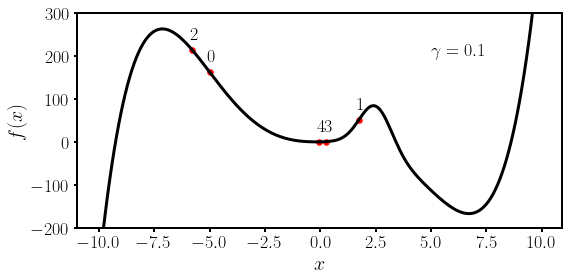

In [161]:
fig = plt.figure(figsize = (8,4))
plt.plot(xx,yy, color = 'black', lw = 3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.ylim(-200,300)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)


v = app2[0:5]
plt.scatter(v, f(np.array(v)), color = 'red', s = 30)
for i in range(len(v)):
    plt.text(v[i]-0.1, f(v[i])+25, str(i), fontsize = 18)

plt.text(5,200, r'$\gamma = 0.1$', fontsize = 18)
    
plt.tight_layout()
fig.savefig('gd1.eps')
plt.show()

In [151]:
f(np.array(app2))

array([1.62500000e+02, 5.17940442e+01, 2.12773760e+02, 7.63234945e-01,
       1.46706253e-01, 1.21822824e-01, 1.17608148e-01, 1.16859468e-01,
       1.16725208e-01, 1.16701073e-01, 1.16696732e-01])

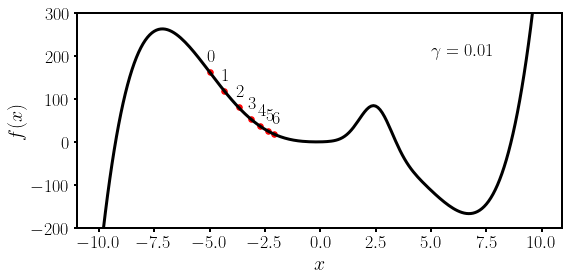

In [164]:
fig = plt.figure(figsize = (8,4))
plt.plot(xx,yy, color = 'black', lw = 3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.ylim(-200,300)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)


v = app3[0:7]
plt.scatter(v, f(np.array(v)), color = 'red', s = 30)
for i in range(len(v)):
    plt.text(v[i]-0.1, f(v[i])+25, str(i), fontsize = 18)

plt.text(5,200, r'$\gamma = 0.01$', fontsize = 18)
    
plt.tight_layout()
fig.savefig('gd1.eps')
plt.show()

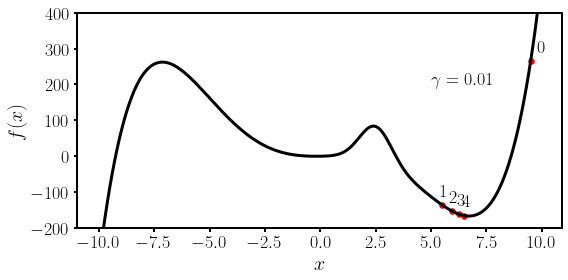

In [180]:
fig = plt.figure(figsize = (8,4))
plt.plot(xx,yy, color = 'black', lw = 3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.ylim(-200,400)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)


v = app4[0:5]
plt.scatter(v, f(np.array(v)), color = 'red', s = 30)
for i in range(len(v)):
    if (i==0):
        plt.text(v[i]+0.3, f(v[i])+25, str(i), fontsize = 18)
    else:
        plt.text(v[i]-0.1, f(v[i])+25, str(i), fontsize = 18)

plt.text(5,200, r'$\gamma = 0.01$', fontsize = 18)
    
plt.tight_layout()
fig.savefig('gd1.eps')
plt.show()